In [1]:
import torch
from diffusers import FluxPipeline
import matplotlib.pyplot as plt

In [2]:
pipe = FluxPipeline.from_pretrained("black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16)
pipe.enable_model_cpu_offload()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [3]:
prompt = "Iron Man fighting the Hulk in front of the Eiffel Tower while civilians are eating their meal"

In [4]:
image = pipe(
    prompt,
    height=512,
    width=512,
    guidance_scale=3.5,
    num_inference_steps=50,
    max_sequence_length=512,
    generator=torch.Generator("cpu").manual_seed(0)
).images[0]

image.save("flux-dev-test.png")

C:\Users\Admin\anaconda3\envs\pytorch_env\Lib\site-packages\transformers\models\clip\modeling_clip.py:480: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


  0%|          | 0/50 [00:00<?, ?it/s]

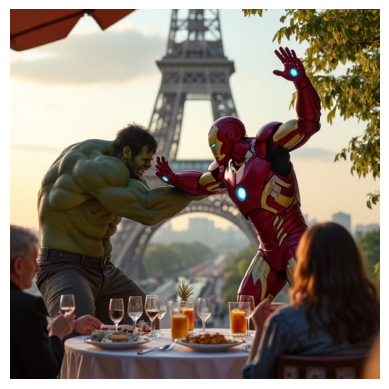

In [5]:
plt.imshow(image)
plt.axis('off')
plt.show()